# **Bikes Price Prediction**

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
# Used for Reading the file
df = pd.read_csv("dataset/Used_Bikes.csv") 
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [3]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [4]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.duplicated().sum()

25324

In [7]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [8]:
df.drop(columns = ['bike_name'], inplace=True)

In [9]:
df.drop(columns = ['city'], inplace = True)

In [10]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [11]:
dt = {
    "First Owner" : 1,
    "Second Owner" : 2,
    "Third Owner" : 3,
    "Fourth Owner Or More" : 4
}
df['owner'] = df['owner'].map(dt)

In [12]:
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

In [13]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [15]:
encoder = LabelEncoder()

In [16]:
output = encoder.fit_transform(df['brand'])

In [17]:
output.__class__

numpy.ndarray

In [18]:
output

array([19, 17, 20, ...,  4,  1,  1])

In [19]:
df['brand'] = output
df

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3.0,110.0,19
1,119900.0,11000.0,1,4.0,350.0,17
2,600000.0,110.0,1,8.0,675.0,20
3,65000.0,16329.0,1,4.0,180.0,19
4,80000.0,10000.0,1,3.0,150.0,21
...,...,...,...,...,...,...
9362,25000.0,48587.0,1,8.0,150.0,5
9369,35000.0,60000.0,1,9.0,220.0,1
9370,450000.0,3430.0,1,4.0,750.0,4
9371,139000.0,21300.0,1,4.0,400.0,1


In [20]:
x = df.drop('price', axis = 1)
y = df[['price']]

In [21]:
print(x)
print(y)

      kms_driven  owner  age  power  brand
0        17654.0      1  3.0  110.0     19
1        11000.0      1  4.0  350.0     17
2          110.0      1  8.0  675.0     20
3        16329.0      1  4.0  180.0     19
4        10000.0      1  3.0  150.0     21
...          ...    ...  ...    ...    ...
9362     48587.0      1  8.0  150.0      5
9369     60000.0      1  9.0  220.0      1
9370      3430.0      1  4.0  750.0      4
9371     21300.0      1  4.0  400.0      1
9372      7127.0      1  5.0  220.0      1

[7324 rows x 5 columns]
         price
0      35000.0
1     119900.0
2     600000.0
3      65000.0
4      80000.0
...        ...
9362   25000.0
9369   35000.0
9370  450000.0
9371  139000.0
9372   80000.0

[7324 rows x 1 columns]


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
y_test

,price
4909,88400.0
1942,102850.0
5763,67000.0
4800,30000.0
7614,20000.0
...,...
5653,395000.0
609,140000.0
4211,54500.0
6379,114000.0


In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5859, 5), (1465, 5), (5859, 1), (1465, 1))

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
lr.score(x_train, y_train) * 100

65.83186303624649

In [27]:
lr.score(x_test, y_test) * 100

71.75947383086563

In [28]:
pred = lr.predict(x_test)
pred

array([[150683.50273601],
       [246408.76411648],
       [ 94949.23656378],
       ...,
       [ 37079.00523583],
       [238205.04024506],
       [ 36702.67235501]])

In [29]:
y_test['pred'] = pred.ravel()
y_test

,price,pred
4909,88400.0,150683.502736
1942,102850.0,246408.764116
5763,67000.0,94949.236564
4800,30000.0,2790.775522
7614,20000.0,6456.787056
...,...,...
5653,395000.0,411532.041280
609,140000.0,102647.279228
4211,54500.0,37079.005236
6379,114000.0,238205.040245


# LOSS fUNCTION
- MEAN SQUARED ERROR
- MEAN ABSOLUTE RROR
- ROOT MEAN SQUARED ERROR

# MSE

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(y_test['price'] , y_test['pred'])

In [32]:
print("MSE : " , mse)

MSE :  5498068117.732576


# MAE

In [33]:
from sklearn.metrics import mean_absolute_error


In [34]:
mae = mean_absolute_error(y_test['price'] , y_test['pred'])

In [35]:
print('MAE: ' ,mae)

MAE:  37787.34371410066


# RMSE

In [36]:
from sklearn.metrics import root_mean_squared_error

In [37]:

rmse = np.sqrt(mse) 
# rmse = root_mean_squared_error(y_test['price'] , y_test['pred'])

In [38]:
print("RMSE: ", rmse)

RMSE:  74148.95897942585


# HUBER LOSS

## Huber loss
- confusion metrics
-  accuracy 
-  precision
- recall
- f1 score

In [39]:
from sklearn.metrics import confusion_matrix , f1_score , precision_score ,  accuracy_score , recall_score

In [40]:
y_test['pred'] = (y_test['pred'] >0.5).astype(int)

In [41]:
y_test['price'] = (y_test['price'] >0.5).astype(int)

In [42]:
y_test['price']

4909    1
1942    1
5763    1
4800    1
7614    1
       ..
5653    1
609     1
4211    1
6379    1
647     1
Name: price, Length: 1465, dtype: int32

In [43]:
cm =confusion_matrix(y_test['price'] , y_test['pred'])

In [44]:
print("CONFUSION METRICS: ", cm)

CONFUSION METRICS:  [[   0    0]
 [  89 1376]]


In [45]:
accuracy =  accuracy_score(y_test['price'] , y_test['pred'])
print("Accuracy: ", accuracy*100)

Accuracy:  93.92491467576792


In [46]:
precision =precision_score(y_test['price'] , y_test['pred'])
print("Precision : ", precision)

Precision :  1.0


In [47]:
recall = recall_score(y_test['price'] , y_test['pred'])
print("Recall score: ", recall*100)

Recall score:  93.92491467576792


In [48]:
import matplotlib.pyplot as plt
import seaborn  as sns

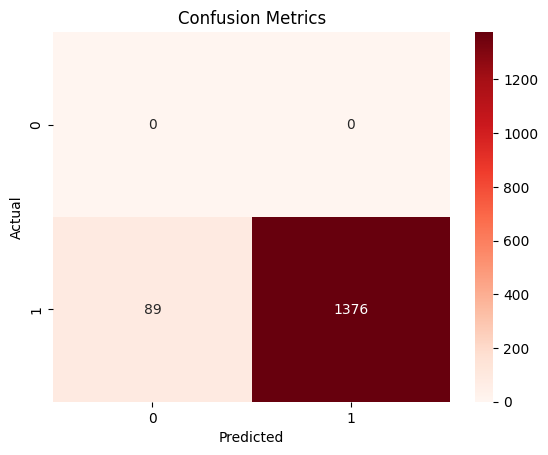

In [49]:
sns.heatmap(cm , annot=True , cmap='Reds' , fmt ='d')
plt.title('Confusion Metrics')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.show()

In [50]:
import os , joblib

In [51]:
os.makedirs('models' , exist_ok=True)

In [52]:
joblib.dump(lr,"./models/Bike_price_linear_model.pkl")

['./models/Bike_price_linear_model.pkl']

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
model = GradientBoostingRegressor()


In [55]:
model.fit(x_train , y_train.values.ravel())

GradientBoostingRegressor()

In [56]:
y_pred = model.predict(x_test)
y_pred

array([ 99941.2040897 , 144231.52264847,  60970.51445021, ...,
        63161.10342403, 110946.69816322,  64010.45172761])

In [57]:
y_test

,price,pred
4909,1,1
1942,1,1
5763,1,1
4800,1,1
7614,1,1
...,...,...
5653,1,1
609,1,1
4211,1,1
6379,1,1


In [58]:
y_test

,price,pred
4909,1,1
1942,1,1
5763,1,1
4800,1,1
7614,1,1
...,...,...
5653,1,1
609,1,1
4211,1,1
6379,1,1


In [59]:
print("training score: ",model.score(x_train,y_train)*100)
# print("testing score: ",model.score(x_test,y_test["price"]))


training score:  94.5602494624803
